In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from astropy.io import ascii

# Useful functions

In [2]:
# unique item finder

def uniquefinder(mylist):
    '''
    Function finds unique values within a list, also stats on occurance rates
    
    inputs: an array or list 
            (integers or strings)
    2 outputs: dictionary of occurances, list of unique values 
    '''
    seen = {}
    dupes = []
    uniq_tics = []
    for x in mylist:
        if x not in seen:
            seen[x] = 1
            uniq_tics.append(x)
        else:
            if seen[x] == 1:
                dupes.append(x)
            seen[x] += 1
    uniques = len(uniq_tics)
    print('There are {} unique tics out of the original {}.'.format(uniques,len(mylist)),\
        '\nUse the first output dictionary', \
          'to see number of occurances for duplicates')
    return seen, uniq_tics


#useful fcn - compares lists & returns what didnt match
def returnNotMatches(a, b):
    '''
    inputs: a,b
            both lists or arrays
    outputs: not in b, not in a
            two lists
    '''
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a


def find_range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)


def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return m.floor(n * multiplier) / multiplier


def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return m.ceil(n * multiplier) / multiplier


# based on training set
def label_meanings(label):
    ''' 
    1== Periodic = "very clear periodicity in light curve"; 
    2==Complex = "clear periodicity but complicated by multiple spots or low signal to noise";
    3== EB = "eclipsing binaries"; 
    4==Binaries = "likely eclipsing binaries too"; 
    5==Flat = "no rotational modulation"
    '''
    mydictionary = {1:'Astrophysical Signal',3:'Likely Eclipsing Binary',5:'Flat',2:'nothing',4:'nothing'}
    return(mydictionary[label])

def abs_mag(m,D):
    '''
    ~converts apparent mag to absolute mag~
    args:
          m: apparent mag
          D: 1/parallax in parsecs
    RETURNS: absolute mag
    '''
    return m - 5*np.log10(D) + 5

def mas_to_parsec(mas):
    '''
    ~converts milliarcseconds(mas) to parsecs, useful b/c Gaia parallax in mas~
    args:
         mas: parallax measure in mas
    RETURNS: parallax in parsecs
    '''
    return mas * 1000

def get_D(parallax):
    '''
    ~converts parallax to distance~
    args:
        parrallax: parallax measure in mas
    RETURNS: distance
    '''
    plx = mas_to_parsec(parallax)
    return 1/plx

def slope(x1,x2,y1,y2):
    ''' 
    inputs: coordinates for 2 plotted datapoints
    returns: slope
    '''
    m = (y2 -y1) / (x2-x1)
    return (y2 -y1) / (x2-x1)

def get_b(m,x,y):
    '''
    gives y-intercept(b) for a straight line
    inputs: slope(m); point on line(x,y)
    returns: b
    '''
    b = -(m*x) + y
    return b

# Fix Formating of EXAMPLES

In [3]:
#load data

#training/testing examples from CVZ 
labels_data = ascii.read('data/master_bls_bigstats_stitchedlcs.fits')
labels = pd.read_csv('data/RF2_Classification_TICS_3.csv', header=4)
#training/testing examples from Sectors 14&15
morelabels = pd.read_csv('data/RF1-TrainingSet.csv')

#stats for sec14&15 examples
unseen = pd.read_csv('/Volumes/Seagate-stars/SECTORS/allstats_14_15.csv') #unseen data WITH bls stats

In [4]:
#format cvz examples


#make formats match
labels_data_df = labels_data.to_pandas()
#rename column for matching ease
labels_data_df = labels_data_df.rename(columns={"ID": 'TIC'})
#match CVZ labels into one df
features = pd.merge(labels_data_df, labels, on='TIC')#lose 7 here but its ok, proceed
#drop high teff CVZ examples
features = features[features['Teff']<=6500] #lost 43 here but its ok, proceed
features


/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'KIC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'numcont' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'gaiaqflag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarnin

,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,power,period,depth,transit_time,duration,CLASS,LS_correct,ACF_correct,ACF2_correct,# comments
1,25078924,13,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,2128,1.808656,0.003801,0.624,0.16,3,NaN,NaN,NaN,NaN
3,25155310,13,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,6023,3.288786,0.001560,2.208,0.16,3,NaN,NaN,NaN,NaN
6,30313682,12,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,12441,5.727675,0.095033,4.592,0.16,3,NaN,NaN,NaN,NaN
8,31273263,11,0.018080,12.559911,12.007478,6.253588,0.329218,0.129200,0.094600,12.776399,...,27070,11.286806,0.000296,1.360,0.16,3,1.0,1.0,1.0,# could be a 1 b/c its a huge planet with ~ 22...
10,32150630,12,0.057739,1.485555,0.745751,1.494213,0.452719,0.104419,0.077054,1.491668,...,1295,1.492110,0.006370,0.448,0.16,1,1.0,1.0,0.0,# acf2 is a double harmonic; also these rps ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,364302118,12,0.035577,0.672685,1.346318,1.380921,0.440631,0.052412,0.032581,1.345834,...,909,1.345427,0.007843,1.104,0.16,3,NaN,NaN,NaN,NaN
334,382069441,12,0.035260,5.477068,5.594156,5.365352,0.634746,0.129890,0.104538,5.488893,...,40711,16.470489,0.002633,1.792,0.16,3,NaN,NaN,NaN,#investigate this huge planet more
335,382517745,13,0.008261,10.419558,5.311744,5.424710,0.090711,0.085972,0.061831,10.441675,...,24844,10.440909,0.000277,1.232,0.16,3,NaN,NaN,NaN,NaN
337,404768019,12,0.056316,0.722297,0.719017,0.725462,0.506582,0.136337,0.124000,0.720834,...,1170,1.444609,0.000082,0.480,0.16,1,1.0,1.0,0.0,"#acf2 is a double harmonic, ls-2 could also be..."


In [5]:
#format secs15&15 examples

#this one line not really necessary - but makes df easier to read by pulling relevant columns
morelabels = morelabels[['Periodic','P_sector','Non-periodic','NP_sector']]
#pull columns & remove nans
sec1415_tics_p = morelabels['Periodic'].to_numpy()[~np.isnan(morelabels['Periodic'].to_numpy())] 
sec1415_tics_np = morelabels['Non-periodic'].to_numpy()[~np.isnan(morelabels['Non-periodic'].to_numpy())]
sec1415_secs_p = morelabels['P_sector'].to_numpy()[~np.isnan(morelabels['P_sector'].to_numpy())]
sec1415_secs_np = morelabels['NP_sector'].to_numpy()[~np.isnan(morelabels['NP_sector'].to_numpy())]
#generate labels
periodics_label_list = np.repeat(1,len(sec1415_tics_p))
nonperiodics_label_list = np.repeat(5,len(sec1415_tics_np))
#combine columns
sec1415_labels = np.append(periodics_label_list, nonperiodics_label_list)
sec1415_tics = np.append(sec1415_tics_p, sec1415_tics_np)
sec1415_secs = np.append(sec1415_secs_p, sec1415_secs_np)

#put into new df
sec1415_info = {'TIC': sec1415_tics, 'Sector': sec1415_secs, 'CLASS': sec1415_labels}
extralabels_1 = pd.DataFrame(sec1415_info)
#merge these examples with their data 
extralabels_2 = pd.merge(unseen, extralabels_1, on=['TIC','Sector'])
#rename some columns to match features
extralabels_3 = extralabels_2.rename(columns={"ls-1": 'ls1','ls-2':'ls2','ls-3':'ls3','lsamp-1':'lsamp1',
                                         'lsamp-2':'lsamp2','lsamp-3':'lsamp3'})

In [6]:
# combine cvz & sec14-15 examples


print('Before merge length:',len(features))
#merge with CVZ features 
features = pd.concat([features, extralabels_3])

#do a teff cut to match desired range
features = features[features['Teff']<=6500]
#do another cut if dont have necessary data to be sure on MS
step1 = features[pd.notna(features['plx']).to_numpy()]
step2 = step1[pd.notna(step1['GAIAmag'].to_numpy())]
features = step2[pd.notna(step2['Teff'].to_numpy())]
print('After merge length:',len(features))
features

Before merge length: 297
After merge length: 351


,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,LS_correct,ACF_correct,ACF2_correct,# comments,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector
1,25078924,13.0,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25155310,13.0,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30313682,12.0,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31273263,11.0,0.018080,12.559911,12.007478,6.253588,0.329218,0.129200,0.094600,12.776399,...,1.0,1.0,1.0,# could be a 1 b/c its a huge planet with ~ 22...,NaN,NaN,NaN,NaN,NaN,NaN
11,38586438,11.0,0.021472,1.110549,0.555587,1.115110,0.242232,0.179837,0.042648,1.111112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,202426247,NaN,4452.032031,4.419334,2.215200,6.006660,0.787052,0.254805,0.144533,NaN,...,NaN,NaN,NaN,NaN,0.309322,170.0,0.000067,0.29,0.172,15.0
73,219777482,NaN,7216.475000,5.705380,9.929934,3.245566,0.575338,0.414778,0.011112,NaN,...,NaN,NaN,NaN,NaN,0.300378,7.0,0.000024,0.29,0.147,15.0
74,224306020,NaN,1661.129688,2.790292,1.378471,2.372766,0.492578,0.369525,0.086369,NaN,...,NaN,NaN,NaN,NaN,0.300108,2.0,0.000036,0.29,0.145,15.0
75,230077650,NaN,2942.876562,4.139007,2.161909,5.357952,0.785663,0.167051,0.080532,NaN,...,NaN,NaN,NaN,NaN,0.302658,49.0,0.000046,0.29,0.151,15.0


# Keep only Main Sequence stars

/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in log10


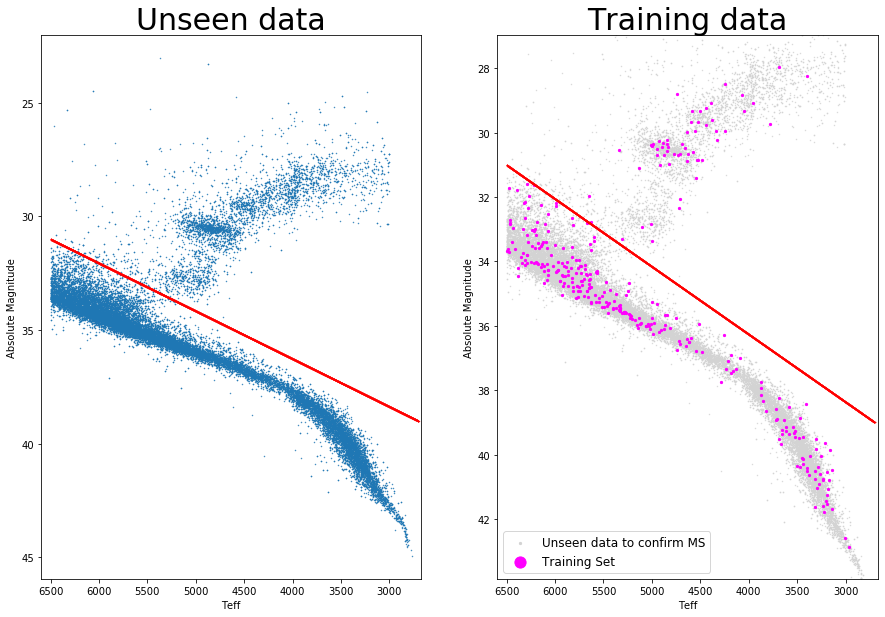

In [7]:
## add Abs_Mag column & find division line ---to remove giants from unseen & training data

## for unseen
u_abs_GAIAmag = []
u_teffs =[]
for plx,mag,temp in unseen[['plx','GAIAmag','Teff']].to_numpy():
    D = get_D(plx)
    newmag=abs_mag(mag,D)
    u_abs_GAIAmag.append(newmag)
    u_teffs.append(temp)
#add to df
unseen['GAIA_AbsMag'] = u_abs_GAIAmag
    
## for training
t_abs_GAIAmag = []
t_teffs =[]
for plx,mag,temp in features[['plx','GAIAmag','Teff']].to_numpy():
    D = get_D(plx)
    newmag=abs_mag(mag,D)
    t_abs_GAIAmag.append(newmag)
    t_teffs.append(temp)
#add to df
features['GAIA_AbsMag'] = t_abs_GAIAmag


################note that red line is the SAME on both plots to ensure training & predicitions share same parameter space
## for unseen
#determine division line params
u_pt1 = [6500,31]
u_pt2 = [2700,39]
u_m = slope(u_pt1[0],u_pt2[0],u_pt1[1],u_pt2[1])
u_b = get_b(u_m,u_pt1[0],u_pt1[1])
#create arrays for line
u_xarr = np.arange(u_pt2[0],u_pt1[0],1)
u_yarr = [u_m*x + u_b for x in u_xarr]
## for training
#determine division line params
t_pt1 = [6500,31]
t_pt2 = [2700,39]
t_m = slope(t_pt1[0],t_pt2[0],t_pt1[1],t_pt2[1])
t_b = get_b(t_m,t_pt1[0],t_pt1[1])
#create arrays for line
t_xarr = np.arange(t_pt2[0],t_pt1[0],1)
t_yarr = [t_m*x + t_b for x in t_xarr]
    
## plot them
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.scatter(u_teffs,u_abs_GAIAmag,s=.2)
ax1.scatter(u_xarr,u_yarr,color='r',s=.2)
ax1.set_ylabel('Absolute Magnitude');ax1.set_xlabel('Teff');
ax1.set_xlim(max(u_teffs)+100,min(u_teffs)-100)
ax1.set_title('Unseen data',fontsize=30);
ax1.set_ylim(max(u_abs_GAIAmag)+1,min(u_abs_GAIAmag)-1);

ax2.scatter(u_teffs,u_abs_GAIAmag,s=.2,label='Unseen data to confirm MS',color='lightgrey')
ax2.scatter(t_teffs,t_abs_GAIAmag,s=5,label='Training Set',color='magenta')
ax2.scatter(t_xarr,t_yarr,color='r',s=.2)
ax2.legend(fontsize='large',markerscale=5)
ax2.set_ylabel('Absolute Magnitude');ax2.set_xlabel('Teff');
ax2.set_xlim(max(t_teffs)+100,min(t_teffs)-300)
ax2.set_ylim(max(t_abs_GAIAmag)+1,min(t_abs_GAIAmag)-1);
ax2.set_title('Training data',fontsize=30);

For training examples use: 
------------------ 
"features_nogiants" 
 
For unseen data use: 
------------------ 
"unseen_nogiants"


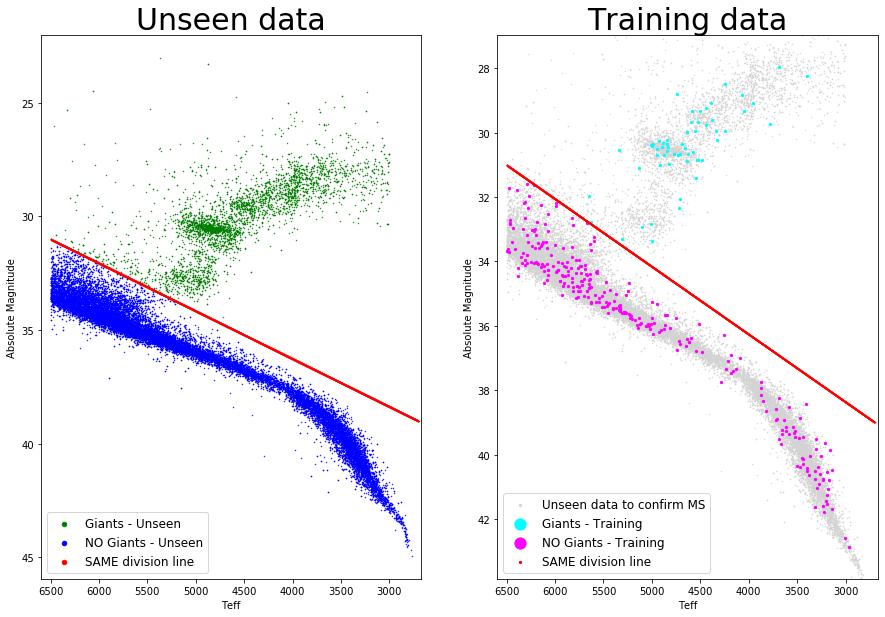

In [8]:
## remove giants & replot to confirm

#do cut for unseen
compare_values = [u_m*x + u_b for x in unseen['Teff'].to_numpy()] #ABSmagnitude value on the red line at star's teff
unseen_nogiants = unseen[[unseen['GAIA_AbsMag'].to_numpy()[i] > compare_values[i] for i in range(len(compare_values))]]
unseen_giantsonly = unseen[[unseen['GAIA_AbsMag'].to_numpy()[i] <= compare_values[i] for i in range(len(compare_values))]]

#do cut for features
compare_values = [t_m*x + t_b for x in features['Teff'].to_numpy()] #ABSmagnitude value on the red line at star's teff
features_nogiants = features[[features['GAIA_AbsMag'].to_numpy()[i] > compare_values[i] for i in range(len(compare_values))]]
features_giantsonly = features[[features['GAIA_AbsMag'].to_numpy()[i] <= compare_values[i] for i in range(len(compare_values))]]
######## note that both "compare_values" are the SAME


#plot to verify cut
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.scatter(unseen_giantsonly['Teff'].to_numpy(),unseen_giantsonly['GAIA_AbsMag'].to_numpy(),s=.2,color='g',label='Giants - Unseen')
ax1.scatter(unseen_nogiants['Teff'].to_numpy(),unseen_nogiants['GAIA_AbsMag'].to_numpy(),s=.2,color='b',label='NO Giants - Unseen')
ax1.scatter(u_xarr,u_yarr,color='r',s=.2,label='SAME division line')
ax1.legend(fontsize='large',markerscale=10)
ax1.set_ylabel('Absolute Magnitude');ax1.set_xlabel('Teff');
ax1.set_xlim(max(u_teffs)+100,min(u_teffs)-100)
ax1.set_title('Unseen data',fontsize=30);
ax1.set_ylim(max(u_abs_GAIAmag)+1,min(u_abs_GAIAmag)-1);

ax2.scatter(u_teffs,u_abs_GAIAmag,s=.2,label='Unseen data to confirm MS',color='lightgrey')
ax2.scatter(features_giantsonly['Teff'].to_numpy(),features_giantsonly['GAIA_AbsMag'].to_numpy(),s=5,label='Giants - Training',color='cyan')
ax2.scatter(features_nogiants['Teff'].to_numpy(),features_nogiants['GAIA_AbsMag'].to_numpy(),s=5,label='NO Giants - Training',color='magenta')
ax2.scatter(t_xarr,t_yarr,color='r',s=.2,label='SAME division line')
ax2.legend(fontsize='large',markerscale=5)
ax2.set_ylabel('Absolute Magnitude');ax2.set_xlabel('Teff');
ax2.set_xlim(max(t_teffs)+100,min(t_teffs)-300)
ax2.set_ylim(max(t_abs_GAIAmag)+1,min(t_abs_GAIAmag)-1);
ax2.set_title('Training data',fontsize=30);

print('For training examples use: \n------------------ \n"features_nogiants" \n \nFor unseen data use: \n------------------ \n"unseen_nogiants"')

# One master df

In [9]:
#merge these so can know which unseen stars are really in the training set

#checking what columns differ
print('FEATURES:',len(list(features_nogiants.columns)),list(features_nogiants.columns))
print('UNSEEN:',len(list(unseen_nogiants.columns)),list(unseen_nogiants.columns))

FEATURES: 156 ['TIC', 'TOTsecs', 'rvar', 'ls1', 'ls2', 'ls3', 'lsamp1', 'lsamp2', 'lsamp3', 'acf1', 'acf2', 'acf3', 'acfamp1', 'acfamp2', 'acfamp3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', '

In [10]:
#dropping unnecessary columns

features_nogiants = features_nogiants.drop(columns=['ACF_correct', 'ACF2_correct', '# comments'])
features_nogiants

,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,duration,CLASS,LS_correct,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,GAIA_AbsMag
1,25078924,13.0,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.354238
3,25155310,13.0,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.375336
6,30313682,12.0,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.839090
11,38586438,11.0,0.021472,1.110549,0.555587,1.115110,0.242232,0.179837,0.042648,1.111112,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.858330
14,38907305,13.0,0.004499,1.288280,1.293625,1.284414,0.018083,0.018049,0.017965,0.780556,...,0.16,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.168263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,202426247,NaN,4452.032031,4.419334,2.215200,6.006660,0.787052,0.254805,0.144533,NaN,...,NaN,1,NaN,0.309322,170.0,0.000067,0.29,0.172,15.0,34.921991
73,219777482,NaN,7216.475000,5.705380,9.929934,3.245566,0.575338,0.414778,0.011112,NaN,...,NaN,1,NaN,0.300378,7.0,0.000024,0.29,0.147,15.0,34.279710
74,224306020,NaN,1661.129688,2.790292,1.378471,2.372766,0.492578,0.369525,0.086369,NaN,...,NaN,1,NaN,0.300108,2.0,0.000036,0.29,0.145,15.0,33.050518
75,230077650,NaN,2942.876562,4.139007,2.161909,5.357952,0.785663,0.167051,0.080532,NaN,...,NaN,1,NaN,0.302658,49.0,0.000046,0.29,0.151,15.0,34.181664


In [11]:
#can delete
print('FEATURES:',len(list(features_nogiants.columns)))
print('UNSEEN:',len(list(unseen_nogiants.columns)))

FEATURES: 153
UNSEEN: 139


In [12]:
#checking if bls stats match just have diff col names ---they do, see print stmt

pd.set_option('display.max_columns', None) #show all columns
#pd.reset_option(“max_columns”) #reset number columns to display

print('from this looks like just have a prior merge that had diff colnames for the bls stats')
features_nogiants.iloc[0:2][['TIC','rvar', 'ls1', 'ls2', 'ls3', 'lsamp1', 'lsamp2', 'lsamp3','power', 'period', 'depth', 'transit_time', 'duration','period_bls', 'power_bls', 'depth_bls', 'dur_bls', 'tt_bls']]

from this looks like just have a prior merge that had diff colnames for the bls stats


,TIC,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,power,period,depth,transit_time,duration,period_bls,power_bls,depth_bls,dur_bls,tt_bls
1,25078924,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,2128.0,1.808656,0.003801,0.624,0.16,NaN,NaN,NaN,NaN,NaN
3,25155310,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,6023.0,3.288786,0.001560,2.208,0.16,NaN,NaN,NaN,NaN,NaN


In [13]:
# changing features df so the multiple bls col names match

badnames = ['power', 'period', 'depth', 'transit_time', 'duration']
goodnames = ['power_bls', 'period_bls', 'depth_bls', 'tt_bls', 'dur_bls']
amp = []; per = []; dep = []; tt = []; dur = []
for i in range(len(badnames)):
    g = goodnames[i]
    b = badnames[i]
    goodcol = features_nogiants[g].to_numpy()
    badcol = features_nogiants[b].to_numpy()
    for count,gval in enumerate(goodcol):
        bval = badcol[count]
        if np.isnan(bval)==True:
            if i == 0:
                amp.append(gval)
            elif i ==1:
                per.append(gval)
            elif i ==2:
                dep.append(gval)
            elif i ==3:
                tt.append(gval)
            elif i ==4:
                dur.append(gval)
            else:
                print('problem')
        elif np.isnan(gval)==True:
            if i == 0:
                amp.append(bval)
            elif i ==1:
                per.append(bval)
            elif i ==2:
                dep.append(bval)
            elif i ==3:
                tt.append(bval)
            elif i ==4:
                dur.append(bval)
            else:
                print('problem')
        elif bval == gval:
            print('problem they match')
        else:
            pass
#             print('no match',bval,gval)
        
print(len(features_nogiants['power'].to_numpy()), len(amp))

292 292


In [14]:
#drop unneeded columns

#add correct title columns
features_nogiants['power_bls'] = amp
features_nogiants['period_bls'] = per
features_nogiants['depth_bls'] = dep
features_nogiants['tt_bls'] = tt
features_nogiants['dur_bls'] = dur

In [15]:
#drop wrongly named columns now that data saved under correct column name

#check of changes -- good
#features_nogiants[['power', 'period', 'depth', 'transit_time', 'duration','power_bls','period_bls','depth_bls','tt_bls','dur_bls']]
#drop unneeded columns
features_nogiants = features_nogiants.drop(columns = ['power', 'period', 'depth', 'transit_time', 'duration',
                                                     'acf1','acf2','acf3','acfamp1','acfamp2','acfamp3'])
#rename ls stats in features to match unseen
diff_cols_f2u = {'ls1':'ls-1', 'ls2':'ls-2', 'ls3':'ls-3', 'lsamp1':'lsamp-1', 
                 'lsamp2':'lsamp-2', 'lsamp3':'lsamp-3'}
features_nogiants = features_nogiants.rename(columns=diff_cols_f2u)
#recompare columns 
print('FEATURES:',len(list(features_nogiants.columns)),list(features_nogiants.columns))
print('UNSEEN:',len(list(unseen_nogiants.columns)),list(unseen_nogiants.columns))

FEATURES: 142 ['TIC', 'TOTsecs', 'rvar', 'ls-1', 'ls-2', 'ls-3', 'lsamp-1', 'lsamp-2', 'lsamp-3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'eneg_Mass', 'epos_Mass', 'eneg_Rad', 'epos_Rad', 'e

In [62]:
#checking how to merge & properly match examples from secs 14&15 while appending cvz examples

#only diffs between dfs now - but these are needed
diff_cols_features = ['TOTsecs','CLASS','LS_correct']
diff_cols_unseen = []

#these didnt work
#merge to one df
# print('Before merge - features/unseen:',len(features_nogiants),len(unseen), 'total:',len(features_nogiants)+len(unseen))
#need to drop cvz examples from features
# sec1415_features = features_nogiants[(features_nogiants['Sector'] == 14.) | (features_nogiants['Sector'] == 15.)]
# sec1415_features

#found division for features betwn secs1415 & cvz examples---up to 214 is cvz; 215+ is sec1415
for count,i in enumerate(features_nogiants['TOTsecs'].to_numpy()): #TOTsecs
    print(count,':',i)

0 : 13.0
1 : 13.0
2 : 12.0
3 : 11.0
4 : 13.0
5 : 13.0
6 : 13.0
7 : 13.0
8 : 13.0
9 : 12.0
10 : 12.0
11 : 12.0
12 : 11.0
13 : 12.0
14 : 12.0
15 : 11.0
16 : 13.0
17 : 10.0
18 : 13.0
19 : 13.0
20 : 12.0
21 : 13.0
22 : 13.0
23 : 10.0
24 : 13.0
25 : 12.0
26 : 12.0
27 : 13.0
28 : 12.0
29 : 12.0
30 : 13.0
31 : 13.0
32 : 12.0
33 : 12.0
34 : 12.0
35 : 12.0
36 : 12.0
37 : 12.0
38 : 12.0
39 : 12.0
40 : 12.0
41 : 12.0
42 : 12.0
43 : 12.0
44 : 13.0
45 : 12.0
46 : 13.0
47 : 13.0
48 : 12.0
49 : 12.0
50 : 13.0
51 : 13.0
52 : 12.0
53 : 13.0
54 : 10.0
55 : 13.0
56 : 13.0
57 : 10.0
58 : 13.0
59 : 11.0
60 : 12.0
61 : 13.0
62 : 12.0
63 : 12.0
64 : 13.0
65 : 13.0
66 : 13.0
67 : 13.0
68 : 12.0
69 : 11.0
70 : 11.0
71 : 12.0
72 : 11.0
73 : 11.0
74 : 12.0
75 : 12.0
76 : 12.0
77 : 12.0
78 : 12.0
79 : 12.0
80 : 11.0
81 : 10.0
82 : 13.0
83 : 11.0
84 : 12.0
85 : 12.0
86 : 12.0
87 : 12.0
88 : 12.0
89 : 13.0
90 : 11.0
91 : 12.0
92 : 11.0
93 : 11.0
94 : 12.0
95 : 12.0
96 : 12.0
97 : 11.0
98 : 11.0
99 : 12.0
100 : 11.0

In [70]:
#merge features from sec1415 into unseen, then can simply append cvz examples in next cell


#drop repeated columns to avoid duplicates in merge
cvz_features = features_nogiants[:214] #only cvz have TOTsecs & LS_correct columns
sec1415_features = features_nogiants[['TIC','Sector','CLASS']][215::]
#add training example stats to correct targets in unseen
print('before unseen/sec1415features:',len(unseen_nogiants),len(sec1415_features),'total expecting:',len(unseen_nogiants))
almost_onedf = unseen_nogiants.merge(sec1415_features, on=['TIC','Sector'],how='outer')
almost_onedf

before unseen/sec1415features: 25920 77 total expecting: 25920


,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS
0,7582633,0.301299,24,0.000203,0.29,0.166,14,75.968750,14.495760,8.173459,5.793739,0.027063,0.026724,0.008033,20190415,NaN,3524-01044-1,680-061924,18091885+4555276,NaN,NaN,2.116190e+18,53650963.0,NaN,STAR,tmgaia2,272.328561,45.924314,tmgaia2,24.2607,0.042967,11.7292,0.046500,gaia2,8.14582,0.022691,gaia2,73.301715,26.150846,274.591687,69.326483,11.333,0.092,10.5310,0.0070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.252,0.027,8.954,0.033,8.873,0.020,AAA-222-111-000-0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.38860,0.000284,9.91674,0.0060,rered,gaia2,5554.00,121.098,4.45318,0.079426,NaN,NaN,0.971881,0.050337,0.978,0.125753,1.065370,0.238090,DWARF,0.809738,0.021547,122.3290,0.34250,0.008755,0.003926,127.0,0.564619,NaN,NaN,0.003594,0.003624,0.004228,panstarrs,0.169164,0.082342,0.044755,0.055918,0.181808,0.294372,0.086419,0.072433,0.022618,0.020475,0.3420,0.3430,bj2018,141.633,100.5630,dered,10.77450,0.000864,9.87045,0.000981,1.0,NaN,tycho2v3,tycho2b3,NaN,0.723606,0.721110,272.328711,45.924364,0.021227,0.022591,1,0,185853561,34.943274,NaN
1,7582634,0.301299,24,0.000365,0.29,0.166,14,74.171191,7.750743,3.649676,5.420053,0.013480,0.007127,0.005853,20190415,NaN,3524-01044-2,680-061925,18091933+4555316,NaN,J180919.25+455530.7,2.116190e+18,NaN,NaN,STAR,tmgaia2,272.330567,45.925458,tmgaia2,22.2159,0.054323,12.2035,0.059067,gaia2,8.21783,0.029665,gaia2,73.303305,26.149741,274.595784,69.327562,12.079,0.222,11.5160,0.0150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.689,0.021,9.313,0.018,9.245,0.013,AAA-222-111-000-0-0,NaN,8.255,0.014,8.243,0.013,8.529,0.024,8.370,0.227,11.02520,0.000530,10.48040,0.0061,rered,gaia2,5145.00,128.105,4.50807,0.086105,NaN,NaN,0.860023,0.053306,0.869,0.102914,1.366120,0.338349,DWARF,0.466935,0.012886,121.2620,0.43950,0.008720,0.003925,126.0,1.575013,NaN,NaN,0.002653,0.003421,0.004429,panstarrs,0.086630,0.119198,0.045958,0.060655,0.299357,0.377342,0.073320,0.098890,0.011682,0.014089,0.4380,0.4410,bj2018,125.286,130.9240,dered,11.49010,0.001895,10.43260,0.001216,1.0,NaN,tycho2v3,tycho2b3,NaN,0.914857,0.916109,272.330704,45.925511,0.026870,0.032185,1,0,185853562,35.598986,NaN
2,7583285,0.302712,50,0.000313,0.29,0.167,14,38.014453,12.708452,7.928387,4.513731,0.004810,0.004131,0.003537,20190415,NaN,3528-00364-1,687-061847,18092939+4713366,NaN,J180929.20+471334.6,2.122354e+18,53651020.0,NaN,STAR,tmgaia2,272.372393,47.226775,tmgaia2,-159.3920,0.035871,-168.4540,0.044838,gaia2,5.42278,0.018274,gaia2,74.726667,26.405487,274.861046,70.626027,12.810,0.354,12.0900,0.0250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.579,0.024,10.227,0.019,10.158,0.016,AAA-222-111-000-0-0,NaN,10.109,0.023,10.154,0.020,10.145,0.044,9.040,NaN,11.77800,0.000207,11.29720,0.0060,rered,spect,5408.12,119.998,4.57660,0.077301,-0.53,0.048,0.826603,0.043583,0.940,0.116576,1.664320,0.371377,DWARF,0.526591,0.012777,183.4300,0.61950,0.018137,0.004175,125.0,0.039300,NaN,NaN,0.002230,0.004954,0.003395,panstarrs,0.090265,0.142887,0.042840,0.044326,0.405124,0.337630,0.082034,0.07256

In [71]:
# almost_onedf[np.isnan(almost_onedf['CLASS'])==True] #test for nans like this no type or val== b/c wont work

#append cvz examples now
one_df = almost_onedf.append(cvz_features)
one_df

,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS,TOTsecs,LS_correct
0,7582633,0.301299,24.0,0.000203,0.29,0.166,14.0,75.968750,14.495760,8.173459,5.793739,0.027063,0.026724,0.008033,20190415,NaN,3524-01044-1,680-061924,18091885+4555276,NaN,NaN,2116190172684912128.0,53650963.0,NaN,STAR,tmgaia2,272.328561,45.924314,tmgaia2,24.26070,0.042967,11.72920,0.046500,gaia2,8.14582,0.022691,gaia2,73.301715,26.150846,274.591687,69.326483,11.333,0.092,10.531,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.252,0.027,8.954,0.033,8.873,0.020,AAA-222-111-000-0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.38860,0.000284,9.91674,0.0060,rered,gaia2,5554.00,121.098,4.45318,0.079426,NaN,NaN,0.971881,0.050337,0.978,0.125753,1.065370,0.238090,DWARF,0.809738,0.021547,122.329,0.3425,0.008755,0.003926,127.0,0.564619,NaN,NaN,0.003594,0.003624,0.004228,panstarrs,0.169164,0.082342,0.044755,0.055918,0.181808,0.294372,0.086419,0.072433,0.022618,0.020475,0.342,0.343,bj2018,141.633,100.563,dered,10.77450,0.000864,9.87045,0.000981,1.0,NaN,tycho2v3,tycho2b3,NaN,0.723606,0.721110,272.328711,45.924364,0.021227,0.022591,1.0,0,185853561,34.943274,NaN,NaN,NaN
1,7582634,0.301299,24.0,0.000365,0.29,0.166,14.0,74.171191,7.750743,3.649676,5.420053,0.013480,0.007127,0.005853,20190415,NaN,3524-01044-2,680-061925,18091933+4555316,NaN,J180919.25+455530.7,2116190176981234432.0,NaN,NaN,STAR,tmgaia2,272.330567,45.925458,tmgaia2,22.21590,0.054323,12.20350,0.059067,gaia2,8.21783,0.029665,gaia2,73.303305,26.149741,274.595784,69.327562,12.079,0.222,11.516,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.689,0.021,9.313,0.018,9.245,0.013,AAA-222-111-000-0-0,NaN,8.255,0.014,8.243,0.013,8.529,0.024,8.370,0.227,11.02520,0.000530,10.48040,0.0061,rered,gaia2,5145.00,128.105,4.50807,0.086105,NaN,NaN,0.860023,0.053306,0.869,0.102914,1.366120,0.338349,DWARF,0.466935,0.012886,121.262,0.4395,0.008720,0.003925,126.0,1.575013,NaN,NaN,0.002653,0.003421,0.004429,panstarrs,0.086630,0.119198,0.045958,0.060655,0.299357,0.377342,0.073320,0.098890,0.011682,0.014089,0.438,0.441,bj2018,125.286,130.924,dered,11.49010,0.001895,10.43260,0.001216,1.0,NaN,tycho2v3,tycho2b3,NaN,0.914857,0.916109,272.330704,45.925511,0.026870,0.032185,1.0,0,185853562,35.598986,NaN,NaN,NaN
2,7583285,0.302712,50.0,0.000313,0.29,0.167,14.0,38.014453,12.708452,7.928387,4.513731,0.004810,0.004131,0.003537,20190415,NaN,3528-00364-1,687-061847,18092939+4713366,NaN,J180929.20+471334.6,2122354142243763200.0,53651020.0,NaN,STAR,tmgaia2,272.372393,47.226775,tmgaia2,-159.39200,0.035871,-168.45400,0.044838,gaia2,5.42278,0.018274,gaia2,74.726667,26.405487,274.861046,70.626027,12.810,0.354,12.090,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.579,0.024,10.227,0.019,10.158,0.016,AAA-222-111-000-0-0,NaN,10.109,0.023,10.154,0.020,10.145,0.044,9.040,NaN,11.77800,0.000207,11.29720,0.0060,rered,spect,5408.12,119.998,4.57660,0.077301,-0.53,0.048,0.826603,0.043583,0.940,0.116576,1.664320,0.371377,DWARF,0.526591,0.012777,183.430,0.6195,0.018137,0.004175,125.0,0.039300,NaN,NaN,0.002230,0.004954,0.003395,panstarrs,0.09

In [74]:
print(len(list(one_df.columns)),list(one_df.columns))

142 ['TIC', 'period_bls', 'power_bls', 'depth_bls', 'dur_bls', 'tt_bls', 'Sector', 'rvar', 'ls-1', 'ls-2', 'ls-3', 'lsamp-1', 'lsamp-2', 'lsamp-3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'e

In [75]:
#checking if can get back features

features_back = one_df[np.isnan(one_df['CLASS'])==False]
features_back #works!!

,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS,TOTsecs,LS_correct
145,15892293,0.314487,262.0,0.002501,0.29,0.168,14.0,27.918504,11.485900,4.151938,1.904891,0.007010,0.004696,0.004371,20190415,NaN,NaN,654-091134,20281897+4045297,1237663199541592320.0,J202818.99+404528.7,2067424671628093184.0,NaN,NaN,STAR,tmgaia2,307.079047,40.758248,tmgaia2,-3.47562,0.101902,-32.31090,0.089377,gaia2,8.84635,0.061496,gaia2,79.226340,1.211439,327.161621,57.074446,18.365,0.162,16.668,1.133,18.8119,0.019907,17.0725,0.004785,15.6475,0.004060,14.3058,0.004071,13.5896,0.004361,12.163,0.022,11.553,0.019,11.325,0.021,AAA-222-111-000-0-0,NaN,11.075,0.028,10.918,0.032,11.292,NaN,8.565,NaN,15.09010,0.000545,13.7969,0.007299,cdwrf,cdwrf,3304.00,157.000,4.79538,0.005594,NaN,NaN,0.434487,0.013130,0.429796,0.020434,5.240010,0.226018,DWARF,0.020268,0.005106,112.6820,0.78700,0.022002,0.012910,437.0,0.356504,NaN,NaN,0.000792,0.017062,0.008759,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7820,0.7920,bj2018,NaN,NaN,cdwrf,16.62260,0.005483,13.87290,0.001057,1.0,NaN,ucac4,bpbj,cooldwarfs_v8,1.685622,1.386212,307.079027,40.758109,0.047850,0.048988,1.0,0,405129943,39.823921,5.0,NaN,NaN
146,15991015,0.300865,16.0,0.000411,0.29,0.161,14.0,29.978516,4.622380,11.666317,7.162657,0.011675,0.010582,0.008303,20190415,NaN,NaN,652-090895,20285846+4018256,1237663151221964800.0,J202858.49+401826.0,2067399760817334272.0,51803561.0,NaN,STAR,tmgaia2,307.243624,40.307128,tmgaia2,27.81800,0.039727,31.27270,0.046343,gaia2,10.91370,0.026042,gaia2,78.933451,0.846199,327.004673,56.614242,15.100,0.052,13.621,0.041,17.0147,0.008592,15.1284,0.004423,13.2155,0.002737,12.5351,0.001331,12.7395,0.005308,10.773,0.021,10.122,0.017,9.936,0.015,AAA-222-111-000-0-0,NaN,9.846,0.023,9.858,0.021,10.637,NaN,8.189,NaN,12.96140,0.000513,12.0033,0.007291,cdwrf,cdwrf,3875.00,157.000,4.66174,0.010317,NaN,NaN,0.587575,0.017219,0.577831,0.020141,2.848470,0.151335,DWARF,0.070131,0.015545,91.3858,0.21910,0.000000,0.000000,379.0,0.101489,NaN,NaN,0.001699,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2186,0.2196,bj2018,NaN,NaN,cdwrf,13.90070,0.001960,12.01310,0.001066,1.0,NaN,cdwrf,apassdr9,cooldwarfs_v8,0.656202,0.718762,307.243781,40.307262,0.019078,0.025166,1.0,0,405137040,38.151260,5.0,NaN,NaN
147,15996889,0.306771,124.0,0.000232,0.29,0.160,14.0,42.290063,8.671662,5.056476,15.266976,0.009487,0.009217,0.004353,20190415,NaN,3152-00583-1,647-088802,20292097+3912323,NaN,J202920.97+391232.2,2064190458176135168.0,50543965.0,NaN,STAR,tmgaia2,307.337395,39.208980,tmgaia2,5.56855,0.057067,-1.07663,0.064132,gaia2,1.87765,0.036370,gaia2,78.085789,0.144306,326.270158,55.592793,11.667,0.146,11.218,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.463,0.021,10.217,0.017,10.186,0.016,AAA-222-111-000-0-0,NaN,10.104,0.023,10.115,0.021,9.765,0.135,7.550,NaN,11.32930,0.000775,10.9910,0.011600,rered,spect,6460.97,164.340,3.91046,0.097725,-0.5801,0.012107,2.101060,0.128375,1.310000,0.209737,0.141238,0.038159,DWARF,6.930499,0.470334,524.7400,10.09450,0.064151,0.014284,6

In [27]:
#merge into one df - cvz's wont overlap any unseen data b/c unseen from northern hem & features has souther hem cvz's


['acf1', 'acf2', 'acf3', 'acfamp1', 'acfamp2', 'acfamp3']

# RF-1

In [16]:
#to select classes for RF-1 only

#only keep CVZ periodic(1) or flat(5) labels
RF1_features = features_nogiants[(features_nogiants['CLASS']==1) | (features_nogiants['CLASS']==5)] #lost 114 here (approx 2:1 per/flat) but its ok, proceed
RF1_features


,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,acf2,acf3,acfamp1,acfamp2,acfamp3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,CLASS,LS_correct,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,GAIA_AbsMag
14,38907305,13.0,0.004499,1.288280,1.293625,1.284414,0.018083,0.018049,0.017965,0.780556,0.775001,0.940279,0.476612,0.476612,0.473659,20190415,NaN,8884-00983-1,130-004396,04381075-6403506,N,J043810.79-640350.4,4663432853859233024,29815464,NaN,STAR,tmgaia2,69.544850,-64.064062,tmgaia2,20.0490,0.052905,18.6485,0.059095,gaia2,2.86057,0.028910,gaia2,275.049819,-38.597773,6.812223,-81.144983,11.614,0.134,11.04400,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.001,0.027,9.788,0.027,9.687,0.019,AAA-222-111-000-0-0,NaN,9.662,0.023,9.694,0.020,9.640,0.033,9.448,0.447,10.88600,0.000562,10.5022,0.006000,rered,gaia2,6193.00,132.0210,4.01804,0.081264,NaN,NaN,1.769250,0.080503,1.190000,0.167314,0.214873,0.046870,DWARF,4.148347,0.190825,346.116000,3.48950,0.026684,0.009782,121.0,0.010801,N/A,N,0.002634,0.008706,0.010858,schlegel,0.164402,0.170226,0.072445,0.088560,0.042780,0.050959,0.078527,0.084001,0.190808,0.190841,3.4550,3.5240,bj2018,123.0220,141.0210,dered,11.18500,0.001027,10.45630,0.000824,1.0,N,tycho2v3,tycho2b3,N/A,0.967662,0.916397,69.545048,-64.063982,0.026931,0.027750,1.0,0,526443943,5,NaN,19.505230,48697.0,0.007053,0.16,17.776,NaN,33.168263
19,139371600,13.0,0.004312,4.405840,4.768137,4.123799,0.013442,0.009037,0.007418,0.069445,4.530559,4.533337,0.240679,0.066762,0.066760,20190415,NaN,9157-01069-1,093-005054,04281527-7127526,N,J042815.33-712751.9,4653974133283528576,33567088,NaN,STAR,tmgaia2,67.063700,-71.464603,tmgaia2,25.6630,0.038503,58.0639,0.037557,gaia2,4.54222,0.017778,gaia2,284.169474,-36.713163,318.776187,-80.519686,11.424,0.118,10.85700,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.825,0.021,9.575,0.021,9.515,0.019,AAA-222-111-000-0-0,NaN,9.472,0.022,9.497,0.020,9.468,0.033,9.241,0.470,10.73220,0.000281,10.3514,0.006000,rered,spect,6200.91,109.1260,4.30572,0.078510,-0.231934,0.046791,1.270410,0.054211,1.190000,0.165622,0.580379,0.122071,DWARF,2.149842,0.090072,218.765000,0.85750,0.074385,0.009988,308.0,0.007667,N/A,N,0.004768,0.007923,0.012052,schlegel,0.142772,0.188471,0.047170,0.061252,0.115431,0.128711,0.069211,0.087809,0.094525,0.085620,0.8540,0.8610,bj2018,84.8486,133.4030,spect,11.02470,0.001049,10.29940,0.000842,1.0,N,tycho2v3,tycho2b3,N/A,0.735426,0.582431,67.064048,-71.464353,0.018532,0.018696,1.0,0,525703024,1,1.0,9.905858,23436.0,0.000049,0.16,8.816,NaN,34.018541
20,140579537,13.0,0.011740,5.511737,11.058362,6.093628,0.134257,0.092020,0.050129,0.069445,11.245842,11.241676,0.720320,0.363383,0.363364,20190415,NaN,9364-01163-1,070-003403,04331049-7607261,N,J043310.52-760725.9,4628092552980609408,34603801,NaN,STAR,tmgaia2,68.293566,-76.123941,tmgaia2,27.6718,0.038076,21.7392,0.045550,gaia2,5.43475,0.017277,gaia2,289.097954,-34.317077,296.014999,-78.332724,12.821,0.351,12.04500,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.389,0.024,10.022,0.025,9.926,0.023,AAA-222-111-000-0-0,NaN,9.866,0.023,9.904,0.019,9.897,0.036,9.183,NaN,11.56880,0.000840,11.0732,0.006100,rered,ga

# TESTS

In [17]:
#my data to get RF results about
unseen = pd.read_csv('/Volumes/Seagate-stars/SECTORS/LSstats_ticcat_secs1415.csv') #unseen data

mytest = pd.read_csv('/Volumes/Seagate-stars/SECTORS/allstats_14_15.csv') #unseen data WITH bls stats

print(len(unseen.columns),len(mytest.columns))

133 138


In [21]:
#see what stars moved to non-periodic after teff removal


#open rf1 results w/o tic & teff features 
without = pd.read_csv('data/RF1_results_woticteff.csv')
withteff = pd.read_csv('data/RF1_results.csv')
without_non = pd.read_csv('data/RF1_results_woticteff_nonperiodic.csv')
without_non

,TIC,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,predict_class
0,100009042,14,55.823486,3.538941,21.453949,5.602844,0.003191,0.002148,0.001386,20190415,NaN,4153-00095-1,760-042786,11303449+6152543,1.237655e+18,J113034.11+615255.2,8.627671e+17,58595588.0,NaN,STAR,tmgaia2,172.643595,61.881765,tmgaia2,-230.04900,0.053064,79.40350,0.052427,gaia2,8.94848,0.036536,gaia2,138.532181,52.728333,139.008433,51.738656,11.471,0.084,10.685,0.006,14.5637,0.006342,11.0614,0.000437,10.5235,0.000323,10.3563,0.000462,12.6473,0.010802,9.304,0.018,8.937,0.015,8.884,0.020,AAA-222-111-000-0-0,NaN,8.839,0.022,8.898,0.020,8.856,0.028,8.782,0.374,10.47110,0.000298,9.99362,0.006000,rered,gaia2,5511.0,122.687,4.54992,0.076831,NaN,NaN,0.864547,0.044540,0.967000,0.122445,1.496440,0.319283,DWARF,0.621147,0.015663,111.3930,0.45700,0.006175,0.003142,33.0,0.002101,NaN,NaN,0.003387,0.002221,0.004063,panstarrs,0.104277,0.140613,0.045282,0.043798,0.383101,0.255466,0.088990,0.064672,0.012392,0.018935,0.4550,0.4590,bj2018,116.6700,128.7040,dered,10.8596,0.000773,9.94384,0.000808,1.0,NaN,tycho2v3,tycho2b3,NaN,0.959309,0.813067,172.641493,61.882107,0.026133,0.027135,1,0,143483163,35.229846,5
1,100010226,14,28.805200,4.716485,6.707030,8.349113,0.011895,0.010451,0.006019,20190415,NaN,NaN,765-044254,11310162+6250567,1.237655e+18,J113101.63+625055.4,8.637108e+17,58595658.0,NaN,STAR,tmgaia2,172.756937,62.849014,tmgaia2,-18.53410,0.042964,-91.99500,0.044259,gaia2,18.07060,0.030202,gaia2,137.663518,51.918100,138.061370,52.513454,15.264,0.071,13.677,0.062,17.0069,0.008868,14.6540,0.003166,13.2723,0.006131,12.4299,0.000692,11.8882,0.003375,10.516,0.018,9.927,0.017,9.703,0.021,AAA-222-111-000-0-0,NaN,9.562,0.022,9.481,0.020,9.302,0.031,8.932,NaN,12.87830,0.000400,11.82450,0.007348,cdwrf,cdwrf,3677.0,157.000,4.78543,0.005915,NaN,NaN,0.445604,0.013272,0.441839,0.020296,4.993640,0.216924,DWARF,0.032701,0.007570,55.2501,0.09290,0.000000,0.000000,35.0,0.000825,NaN,NaN,0.002784,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bj2018,NaN,NaN,cdwrf,13.9668,0.002638,11.85220,0.001447,1.0,NaN,cdwrf,apassdr9,cooldwarfs_v8,0.780765,0.686367,172.756762,62.848618,0.023487,0.021884,1,0,143483809,39.163163,5
2,100011076,14,66.548633,4.386325,8.079317,1.385391,0.008935,0.006089,0.001920,20190415,NaN,4156-00745-1,765-044263,11320981+6253252,NaN,J113209.76+625325.0,8.637097e+17,58595845.0,NaN,STAR,tmgaia2,173.040936,62.890329,tmgaia2,-37.52050,0.040348,-14.65890,0.040762,gaia2,8.48930,0.027135,gaia2,137.447733,51.945962,138.179250,52.628980,10.717,0.061,10.130,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.978,0.021,8.701,0.016,8.651,0.020,AAA-112-111-000-0-0,NaN,8.609,0.023,8.656,0.019,8.626,0.024,8.977,0.466,9.99716,0.000226,9.57707,0.006100,rered,gaia2,5878.0,117.328,4.47792,0.076355,NaN,NaN,0.985711,0.046387,1.065000,0.133127,1.111990,0.230722,DWARF,1.044989,0.032276,117.3960,0.37650,0.008336,0.002836,37.0,0.003173,NaN,NaN,0.003666,0.003644,0.002028,panstarrs,0.128030,0.138224,0.043655,0.049119,0.216000,0.245444,0.073487,0.079222,0.035883,0.028669,0.3750,0.3780,bj2018,103.7400,130.917

In [22]:
len(withteff), withteff['predict_class'].iloc[1], len(without_non)
# without_non

(11807, 1, 16902)

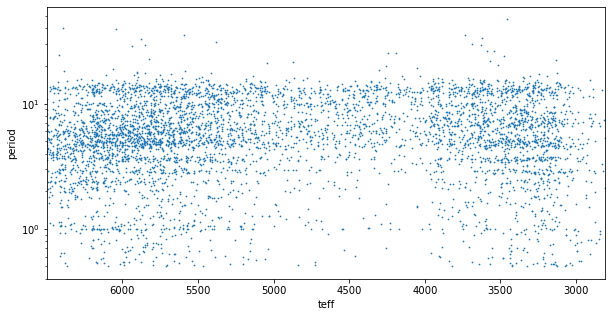

In [23]:
w = list(withteff['TIC'].to_numpy());rp=[];teff=[]
for i in range(len(without_non)):
    wo = without_non['TIC'].iloc[i]
#     print(wo)
    if wo  in w:
        rp.append(without_non['ls-1'].iloc[i])
        teff.append(without_non['Teff'].iloc[i])
    else:
        pass
plt.figure(figsize=(10,5))
plt.scatter(teff,rp,s=.5)
plt.ylabel('period');plt.xlabel('teff')
plt.xlim(max(teff),min(teff));plt.yscale('log');

In [46]:
# test on how to merge
df1 = pd.DataFrame({'id':[1,2,3],'same':[1.1,2.1,3.1],'diff_1':[11,21,31],'sec':[1,1,np.nan]})
df2 = pd.DataFrame({'id':[1,2,5],'same':[1.1,2.1,5.2],'sec':[1,1,5]})

#merge ways
df3 = df1.merge(df2,on=['id','sec'],how='outer') #only keeps matches btwn dfs - not good
df4 = pd.concat([df1,df2]) #appends w/o matching the id:2, it becomes 2 rows - not good
df5 = pd.concat([df1,df2],join='outer')#same as df4
df6 = pd.concat([df1,df2],join='inner')#only keeps id &same columns, drops diffs
# df7 = pd.
df3

,id,same_x,diff_1,sec,same_y
0,1,1.1,11.0,1.0,1.1
1,2,2.1,21.0,1.0,2.1
2,3,3.1,31.0,NaN,NaN
3,5,NaN,NaN,5.0,5.2


In [39]:
# test on how to merge
df1 = pd.DataFrame({'id':[1,2,3,4,5],'same':[1.1,2.1,3.1,4.1,5.1],'diff_1':[11,21,31,41,51],'sec':[1,1,1,1,1]})
df2 = pd.DataFrame({'id':[6,7,8,9,2],'same':[1.2,2.2,3.2,4.2,2.1],'diff_2':[62,72,32,42,52],'sec':[1,np.nan,np.nan,np.nan,1]})



nan

In [44]:
test_1 = features_nogiants[['TIC','Sector','TOTsecs','CLASS','LS_correct']]
test_2 = unseen_nogiants[['TIC','Sector']]
test_3 = test_2.merge(test_1, on=['TIC','Sector'])
# test_3 = pd.concat([test_2,test_1],axis=1)
print('before features/unseen:',len(test_1),len(test_2),'total:',len(test_1) + len(test_2))
print(len(test_3))
test_3

before features/unseen: 292 25920 total: 26212
77


,TIC,Sector,TOTsecs,CLASS,LS_correct
0,15892293,14,NaN,5,NaN
1,15991015,14,NaN,5,NaN
2,15996889,14,NaN,5,NaN
3,16311292,14,NaN,5,NaN
4,16403055,14,NaN,5,NaN
...,...,...,...,...,...
72,202426247,15,NaN,1,NaN
73,219777482,15,NaN,1,NaN
74,224306020,15,NaN,1,NaN
75,230077650,15,NaN,1,NaN
